Владелец фермы «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям и при этом ему нужно выполнять свой план развития молочного хозяйства. Нужно разработать модель машинного обучения, которая поможет владельцу фермы управлять рисками и принимать объективное решение о покупке.

Необходимо создать две прогнозные модели для отбора бурёнок:

1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой)- средний удой за год — не менее 6000 килограммов;
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока) - молоко должно быть вкусным.

План исследования:

- Изучить общую информацию о данных
- Предобработать данные
- Провести исследовательский анализ данных
- Провести корреляционный анализ признаков в датасете
- Выполнить задачу линейной регрессии
- Выполнить задачу логистической регрессии
- Сделать итоговые Выводы 

Описание данных:

1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:

    id — уникальный идентификатор коровы.
    Удой, кг — масса молока, которую корова даёт в год (в килограммах).
    ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
    Сырой протеин, г — содержание сырого протеина в корме (в граммах).
    СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
    Порода — порода коровы.
    Тип пастбища — ландшафт лугов, на которых паслась корова.
    порода папы_быка — порода папы коровы.
    Жирность,% — содержание жиров в молоке (в процентах).
    Белок,% — содержание белков в молоке (в процентах).
    Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

2. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:

    id — уникальный идентификатор коровы.
    Имя Папы — имя папы коровы.

3. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:

    Порода — порода коровы.
    Тип пастбища — ландшафт лугов, на которых паслась корова.
    порода папы_быка — порода папы коровы.
    Имя_папы — имя папы коровы.
    Текущая_жирность,% — содержание жиров в молоке (в процентах).
    Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
    Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
    

## Шаг 1. Загрузка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, \
    recall_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Загрузите данные в датафреймы pandas:

    /datasets/ferma_main.csv
    /datasets/ferma_dad.csv
    /datasets/cow_buy.csv

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', delimiter=";", decimal=",")

In [3]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', delimiter=";")

In [4]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', delimiter=";", decimal=",")

###  Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы.

In [5]:
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [6]:
ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [7]:
ferma_main.columns = ferma_main.columns.str.lower()

In [8]:
ferma_main.head()

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [9]:
ferma_main.rename(columns = {'эке (энергетическая кормовая единица)':'эке', 
                             'спо (сахаро-протеиновое соотношение)':'спо', 
                             'удой, кг':'удой', 
                             'белок,%':'белок', 
                             'жирность,%':'жирность'}, inplace = True)

In [10]:
ferma_main.head(10)

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [11]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой              634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой протеин, г  634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип пастбища      634 non-null    object 
 7   порода папы_быка  634 non-null    object 
 8   жирность          634 non-null    float64
 9   белок             634 non-null    float64
 10  вкус молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [12]:
ferma_dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [13]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [14]:
ferma_dad.columns = ferma_dad.columns.str.lower()

In [15]:
ferma_dad.head(10)

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [16]:
ferma_dad.rename(columns = {'имя папы':'имя_папы'}, inplace = True)

In [17]:
ferma_dad.head(10)

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [18]:
cow_buy.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [19]:
ferma_main.rename(columns = {'эке (энергетическая кормовая единица)':'эке', 
                             'спо (сахаро-протеиновое соотношение)':'спо', 
                             'удой, кг':'удой', 
                             'белок,%':'белок', 
                             'жирность,%':'жирность'}, inplace = True)

In [20]:
cow_buy.rename(columns = {'текущая_жирность,%':'жирность', 'текущий_уровень_белок,%':'белок'}, inplace = True)

In [21]:
cow_buy.columns = cow_buy.columns.str.lower()

In [22]:
cow_buy.head(10)

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [23]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность,%       20 non-null     float64
 5   текущий_уровень_белок,%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [24]:
cow_buy.head(10)

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


**Промежуточный вывод**


- ferma_main
        Стоит изменить названия столбцов и привести их к единому виду
        С типами данных все в порядке

- ferma_dad
        Стоит изменить названия столбцов и привести их к единому виду
        В остальном данные в порядке

- cow_buy
        Стоит изменить названия столбцов и привести их к единому виду      

## Шаг 2.  Предобработка данных

### 2.1 Проверьте данные на наличие пропусков 

In [123]:
ferma_main.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

Series([], Name: nans, dtype: int64)

In [124]:
ferma_dad.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

Series([], Name: nans, dtype: int64)

In [25]:
cow_buy.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

Series([], Name: nans, dtype: int64)

In [27]:
#cow_buy = cow_buy.drop('Вкус молока', axis=1)

Пропусков не обнаружено

In [28]:
cow_buy.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

Series([], Name: nans, dtype: int64)

### 2.1  Проверьте данные на наличие дубликатов.

In [29]:
ferma_main.duplicated().sum()

5

Обнаружено 5 явных дубликатов, удалим их.

In [30]:
ferma_main = ferma_main.drop_duplicates()

In [31]:
ferma_main.duplicated().sum()

0

In [32]:
ferma_dad.duplicated().sum()

0

In [33]:
cow_buy.duplicated().sum()

4

Обнаружено 4 явных дубликатов, удалим их.

In [34]:
cow_buy = cow_buy.drop_duplicates()

In [35]:
cow_buy.duplicated().sum()

0

### Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

In [36]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой протеин, г  629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип пастбища      629 non-null    object 
 7   порода папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


In [37]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [38]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   16 non-null     object 
 1   тип пастбища             16 non-null     object 
 2   порода папы_быка         16 non-null     object 
 3   имя_папы                 16 non-null     object 
 4   текущая_жирность,%       16 non-null     float64
 5   текущий_уровень_белок,%  16 non-null     float64
 6   возраст                  16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


In [39]:
ferma_main['тип пастбища'].value_counts()

Холмистое    351
Равнинное    253
Равнинные     25
Name: тип пастбища, dtype: int64

In [40]:
ferma_main = ferma_main.replace(['Равнинные'],'Равнинное')

In [41]:
ferma_main['тип пастбища'].value_counts()

Холмистое    351
Равнинное    278
Name: тип пастбища, dtype: int64

In [42]:
ferma_main['порода папы_быка'].value_counts()

Соверин    311
Айдиал     240
Айдиалл     78
Name: порода папы_быка, dtype: int64

In [43]:
ferma_main = ferma_main.replace(['Айдиалл'],'Айдиал')

In [44]:
cow_buy = cow_buy.replace(['холмистое', 'равнинное'], ['Холмистое', 'Равнинное'])

**Промежуточный вывод**

- Пропусков не обнаружено.

- ferma_main Обнаружено 5 явных дубликатов, удалим их.
- cow_buy Обнаружено 4 явных дубликатов, удалим их.
- Изменили названия переменных в порода папы_быка и тип пастбища.




## Шаг 3. Исследовательский анализ данных

### 3.1 Проведите статистический анализ всех признаков.

In [44]:
ferma_main.describe()

,id,удой,эке,"сырой протеин, г",спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Удалим значение 45616.000000 в колонке удой 

In [45]:
ferma_main['удой'].sort_values(ascending=False).head(3)

16     45616
70      7222
135     7207
Name: удой, dtype: int64

In [46]:
ferma_main = ferma_main.query('удой != 45616')

In [48]:
# Проверка
ferma_main['удой'].sort_values(ascending=False).head(3)

70     7222
135    7207
296    7201
Name: удой, dtype: int64

In [49]:
ferma_main.describe()

,id,удой,эке,"сырой протеин, г",спо,жирность,белок
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [50]:
ferma_dad.describe()

,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


In [51]:
cow_buy.describe()

,"текущая_жирность,%","текущий_уровень_белок,%"
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


### 3.2 Постройте графики для каждого количественного и категориального признака. 

Построим графики для количественных признаков

In [52]:
ferma_main.head()

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


ЭКЕ (Энергетическая кормовая единица)

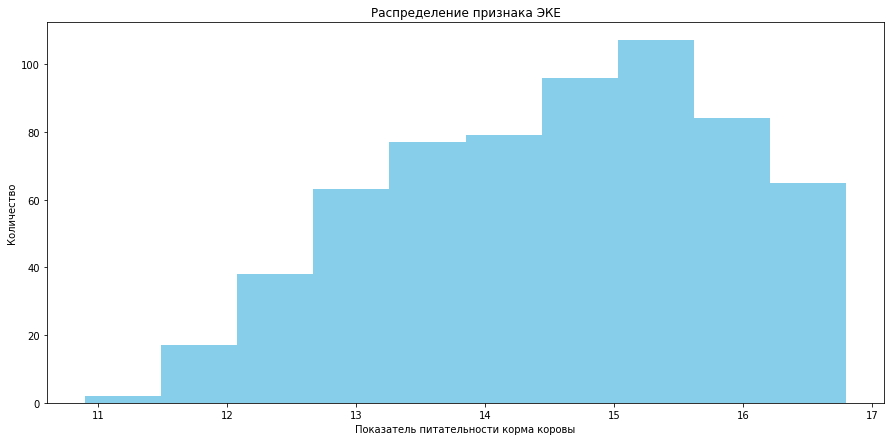

In [53]:
ferma_main['эке'].plot(kind='hist', figsize=(15, 7), color ='skyblue')
plt.title('Распределение признака ЭКЕ')
plt.xlabel('Показатель питательности корма коровы')
plt.ylabel('Количество')
plt.show()

Сырой протеин, г

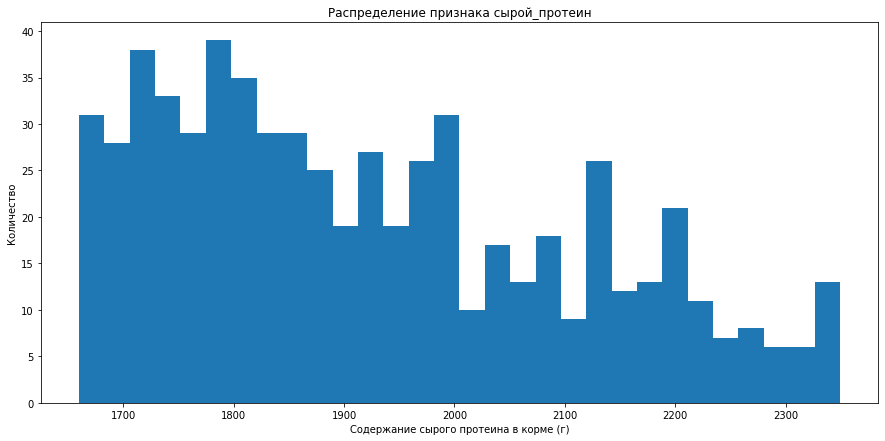

In [54]:
ferma_main['сырой протеин, г'].plot(kind='hist', figsize=(15, 7), bins = 30)
plt.title('Распределение признака сырой_протеин')
plt.xlabel('Содержание сырого протеина в корме (г)')
plt.ylabel('Количество')
plt.show()

СПО (Сахаро-протеиновое соотношение)

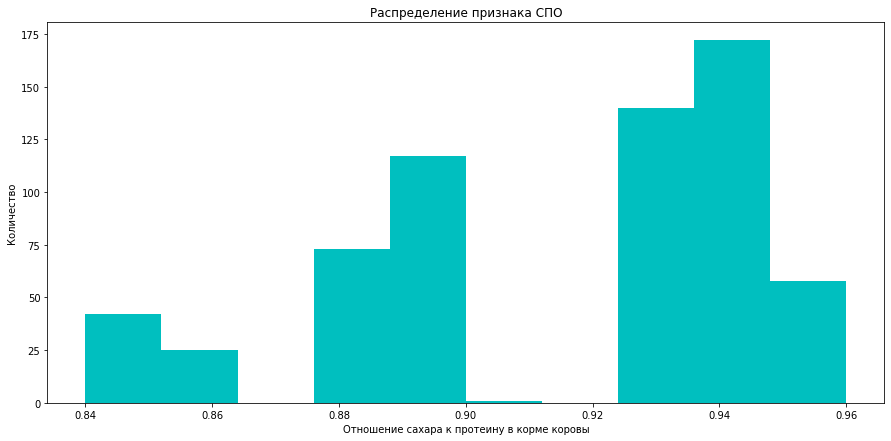

In [55]:
ferma_main['спо'].plot(kind='hist', figsize=(15, 7), color ='c')
plt.title('Распределение признака СПО')
plt.xlabel('Отношение сахара к протеину в корме коровы')
plt.ylabel('Количество')
plt.show()

Удой, кг

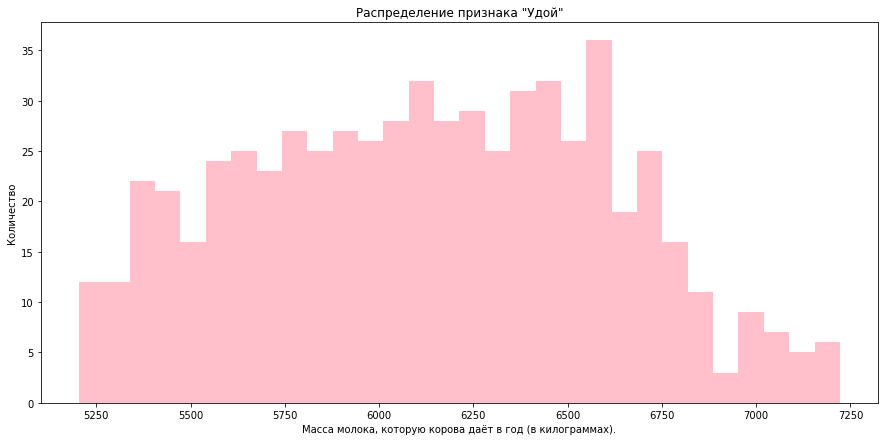

In [59]:
ferma_main['удой'].plot(kind='hist', figsize=(15, 7), bins=30, color ='pink')
plt.title('Распределение признака "Удой"')
plt.xlabel('Масса молока, которую корова даёт в год (в килограммах).')
plt.ylabel('Количество')
plt.show()

Распределение признака выглядит нормальным

Добавляем Ящик с усами

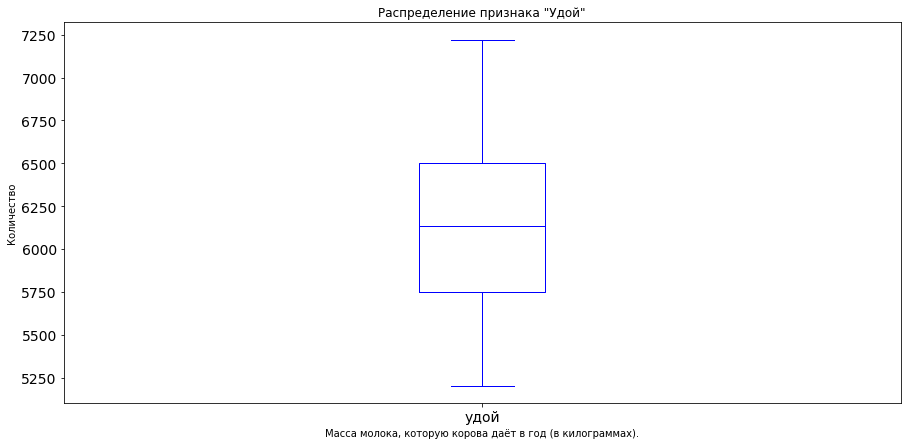

In [61]:
plt.figure(figsize=(15, 7))
ferma_main.boxplot(column=['удой'], grid= False, fontsize=14, color='blue')
#plt.ylim(5000, 8000)
plt.title('Распределение признака "Удой"')
plt.xlabel('Масса молока, которую корова даёт в год (в килограммах).')
plt.ylabel('Количество')
plt.show() 

Медианное значение около 6100, есть выбросы около 7300 и 5200. 

Белок,%

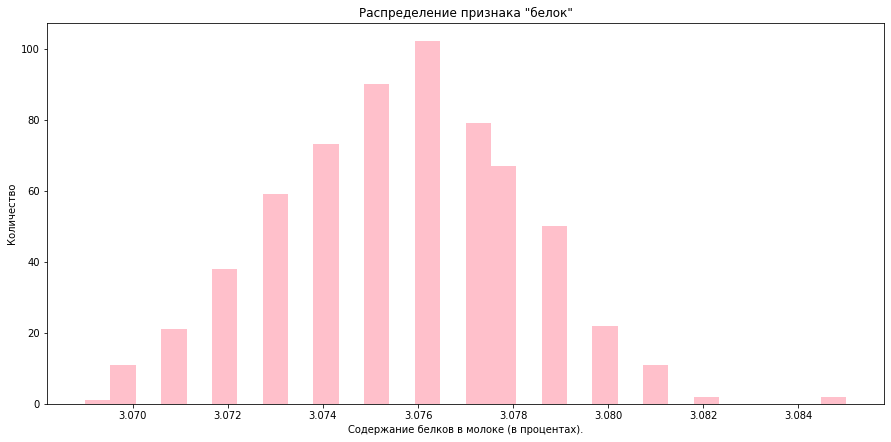

In [56]:
ferma_main['белок'].plot(kind='hist', figsize=(15, 7), bins=30, color ='pink')
plt.title('Распределение признака "белок"')
plt.xlabel('Cодержание белков в молоке (в процентах).')
plt.ylabel('Количество')
plt.show()

Удалим выбросы: значение менее 3.069 и более 3.081

In [57]:
ferma_main = ferma_main.query('3.069 < белок < 3.081 ')

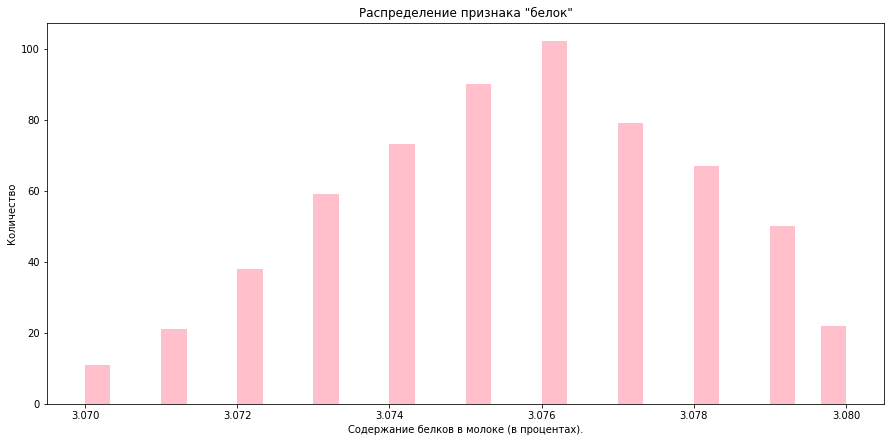

In [58]:
ferma_main['белок'].plot(kind='hist', figsize=(15, 7), bins=30, color ='pink')
plt.title('Распределение признака "белок"')
plt.xlabel('Cодержание белков в молоке (в процентах).')
plt.ylabel('Количество')
plt.show()

Жирность,%

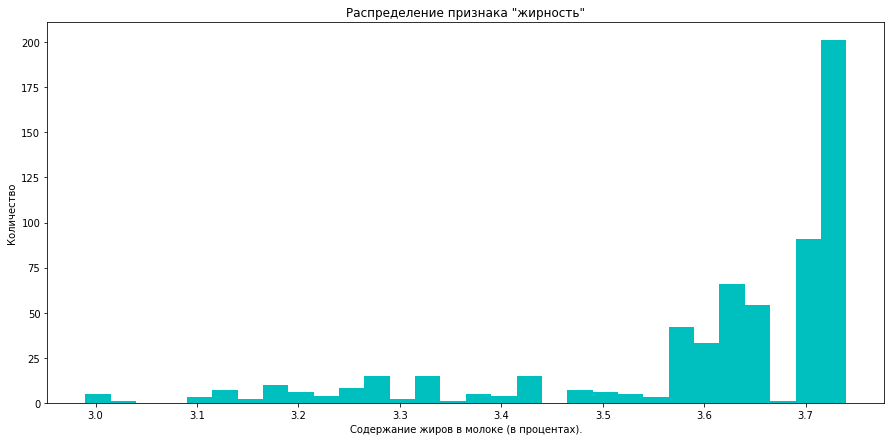

In [59]:
ferma_main['жирность'].plot(kind='hist', figsize=(15, 7), bins=30, color ='c')
plt.title('Распределение признака "жирность"')
plt.xlabel('Cодержание жиров в молоке (в процентах).')
plt.ylabel('Количество')
plt.show()

Построим графики для категориальных признаков

In [60]:
ferma_main.head()

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Вкус молока

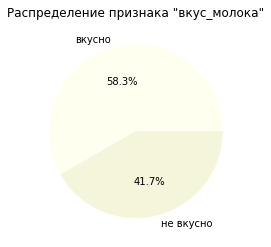

In [61]:
plt.pie(
    ferma_main['вкус молока'].value_counts(),
    labels=['вкусно', 'не вкусно'],
    autopct='%1.1f%%',
    colors=['ivory', 'beige']
)
plt.title('Распределение признака "вкус_молока"')
plt.grid()
plt.show()

Добавила столбчатую диаграмму. 

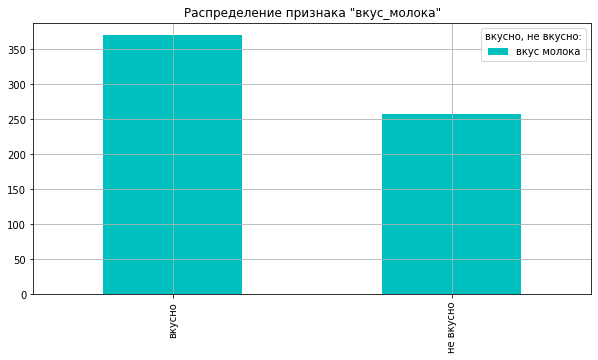

In [73]:
udoy=ferma_main['вкус молока'].value_counts()

udoy.plot(kind='bar', figsize=(10, 5), color = 'c')
plt.title('Распределение признака "вкус_молока"')
plt.grid()
plt.legend(title='вкусно, не вкусно:')
plt.show()

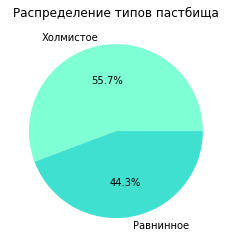

In [62]:
plt.pie(
    ferma_main['тип пастбища'].value_counts(),
    labels=['Холмистое', 'Равнинное'],
    autopct='%1.1f%%',
    colors=['aquamarine', 'turquoise']
)
plt.title('Распределение типов пастбища')
plt.show()

Порода

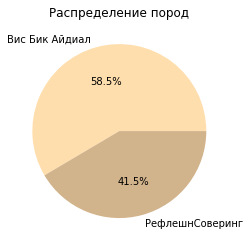

In [63]:
plt.pie(
    ferma_main['порода'].value_counts(),
    labels=['Вис Бик Айдиал ', 'РефлешнСоверинг'],
    autopct='%1.1f%%',
    colors=['navajowhite', 'tan']
)
plt.title('Распределение пород')
plt.grid()
plt.show()

порода папы_быка

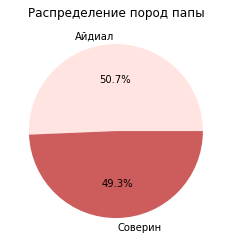

In [64]:
plt.pie(
    ferma_main['порода папы_быка'].value_counts(),
    labels=['Айдиал', 'Соверин'],
    autopct='%1.1f%%',
    colors=['mistyrose', 'indianred']
)
plt.title('Распределение пород папы')
plt.grid()
plt.show()

Возраст

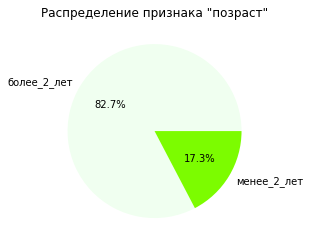

In [65]:
plt.pie(
    ferma_main['возраст'].value_counts(),
    labels=['более_2_лет', 'менее_2_лет'],
    autopct='%1.1f%%',
    colors=['honeydew', 'lawngreen']
)
plt.title('Распределение признака "позраст"')
plt.grid()
plt.show()

### 3.3 Сделайте выводы о данных:

- Удалили значение 45616.000000 в признаке удой
- Удалим выбросы в признаке белок: значение менее 3.069 и более 3.081
- Почти все признаки распределены нормально и не требуют особых корректировок выбросов
- Для признака Удой Медианное значение около 6000, есть выбросы около 7300 и 5200. 
- Распределение категориальных переменных в норме, критических изменений не было внесено

## Шаг 4. Корреляционный анализ

### Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками для ferma_main.csv

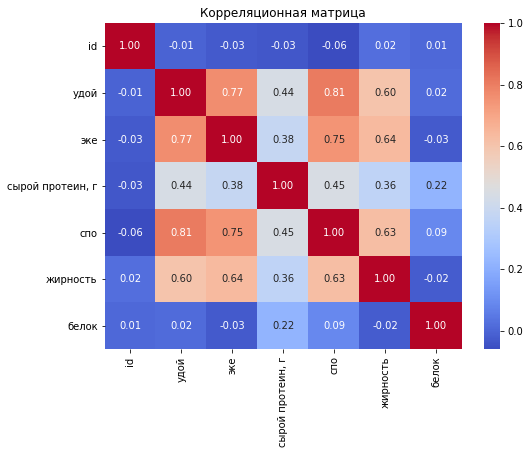

In [66]:
plt.figure(figsize = (8,6))
sns.heatmap(ferma_main.corr(), annot=True, fmt='.2f', cmap="coolwarm") 
plt.title("Корреляционная матрица")
plt.show()

Поскольку целевой признак - удой - опишем корреляцию между ним и другими признаками. 

эке: Наблюдается положительная взаимосвязь выше умеренного значения. С увеличением "удоя" постепенно увеличивается и эке.

сырой_протеин: Взаимосвязь между содержанием сырого протеина и удоем не так ясна. Связь умеренно положительная. Коэффициенты 

спо: Похоже, что СПО сильно зависит от целевого признака - высокий коэффициент корреляции. 

жирность: Умеренно положительная зависимость. 

белок: Связь между этим признаком и целевым - нелинейная. Слабая положительная связь с целевым признаком. 

### Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

In [67]:
ferma_main.head()

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [68]:
corr_attribute = ['эке', 'сырой протеин, г', 'спо', 'жирность', 'белок']

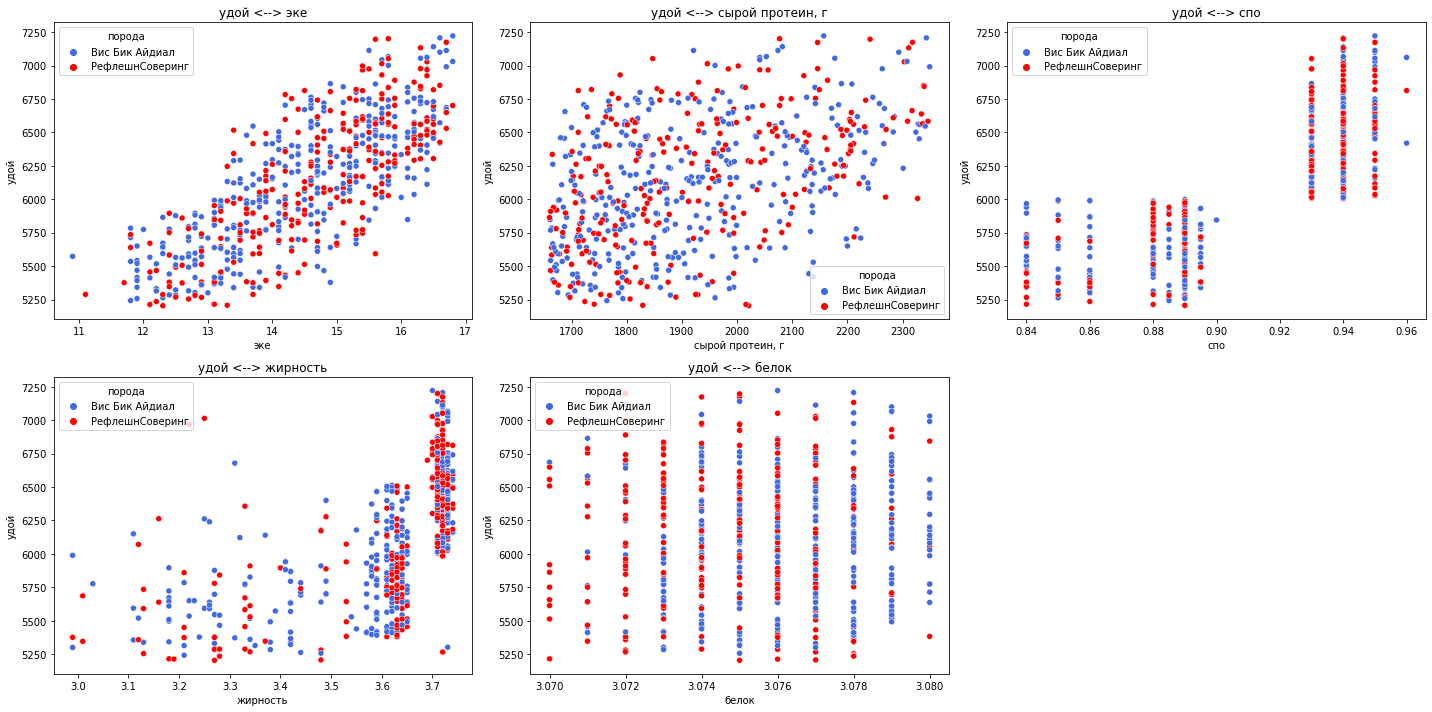

In [69]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(corr_attribute, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой', hue='порода', palette=['royalblue', 'red'])
    plt.title(f'удой <--> {feature}')

plt.tight_layout()
plt.show()


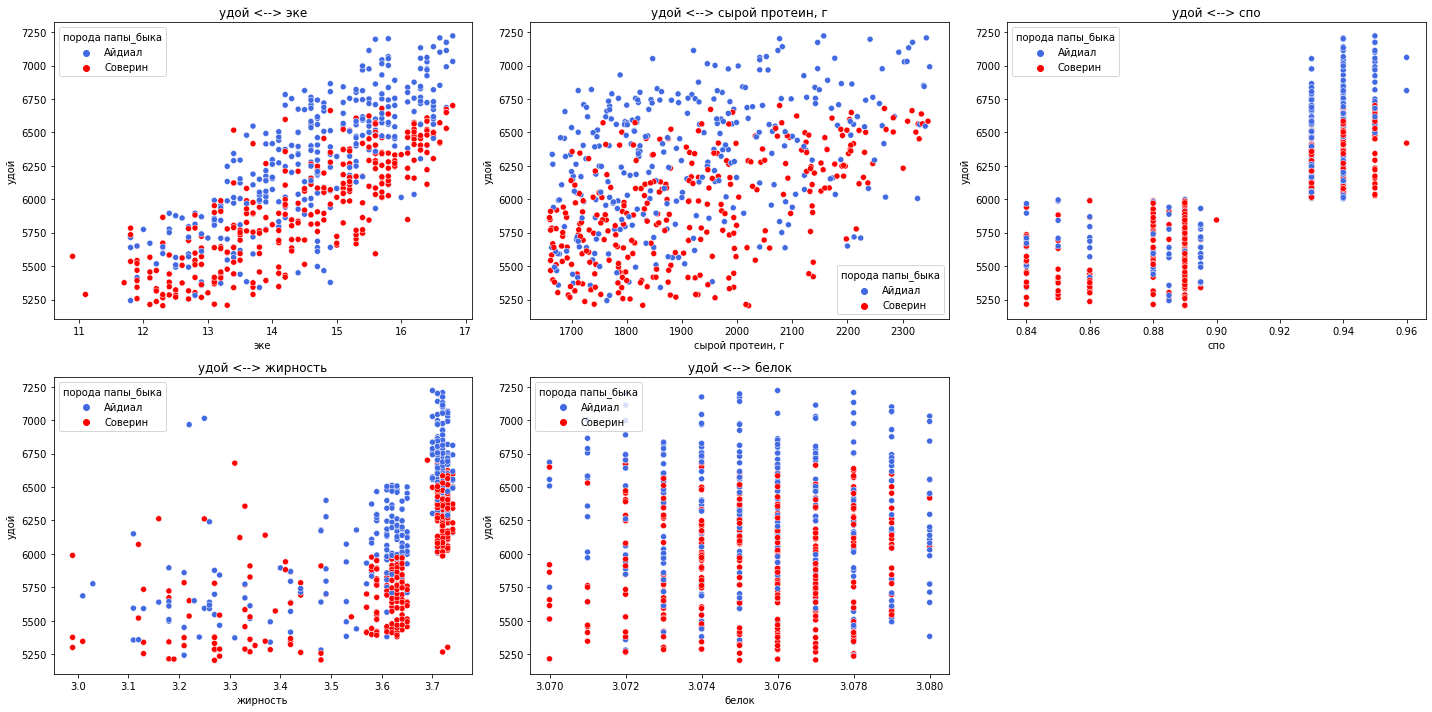

In [70]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(corr_attribute, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой', hue='порода папы_быка', palette=['royalblue', 'red'])
    plt.title(f'удой <--> {feature}')

plt.tight_layout()
plt.show()


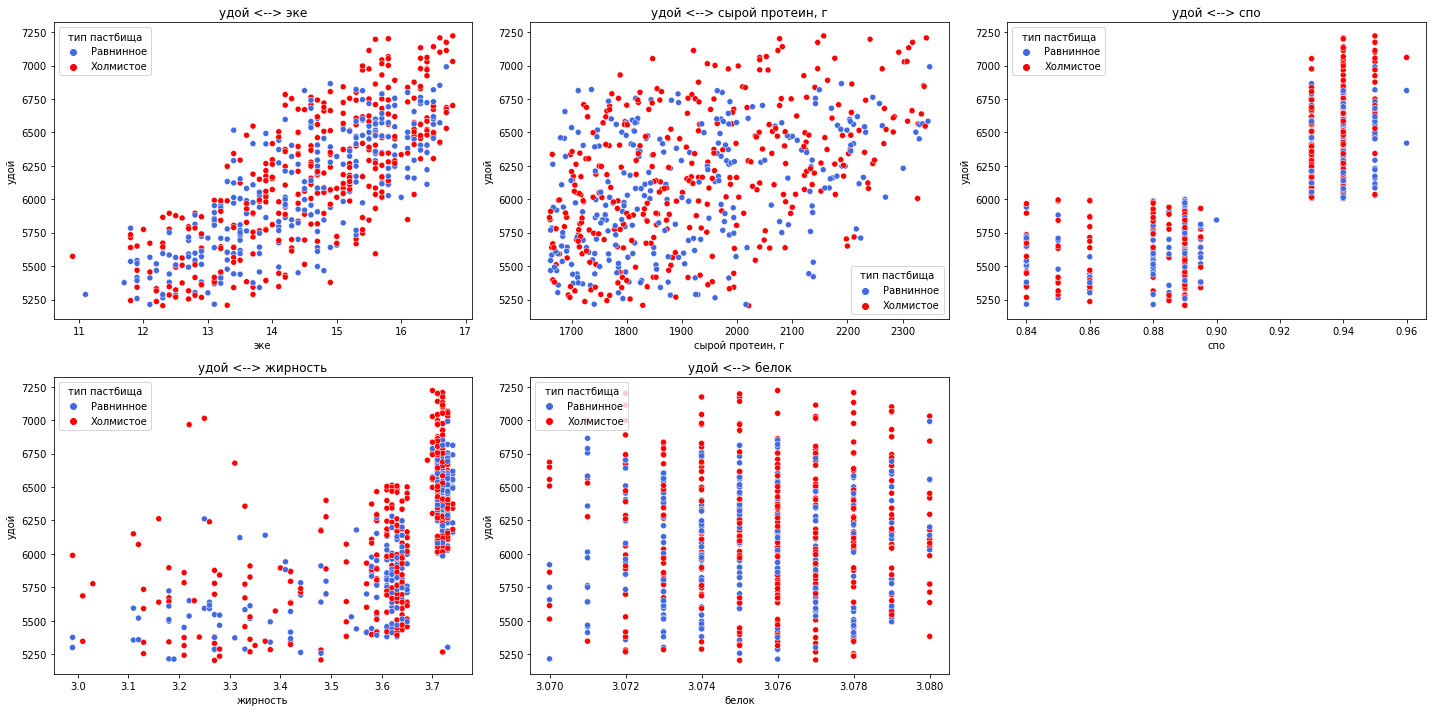

In [71]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(corr_attribute, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой', hue='тип пастбища', palette=['royalblue', 'red'])
    plt.title(f'удой <--> {feature}')

plt.tight_layout()
plt.show()

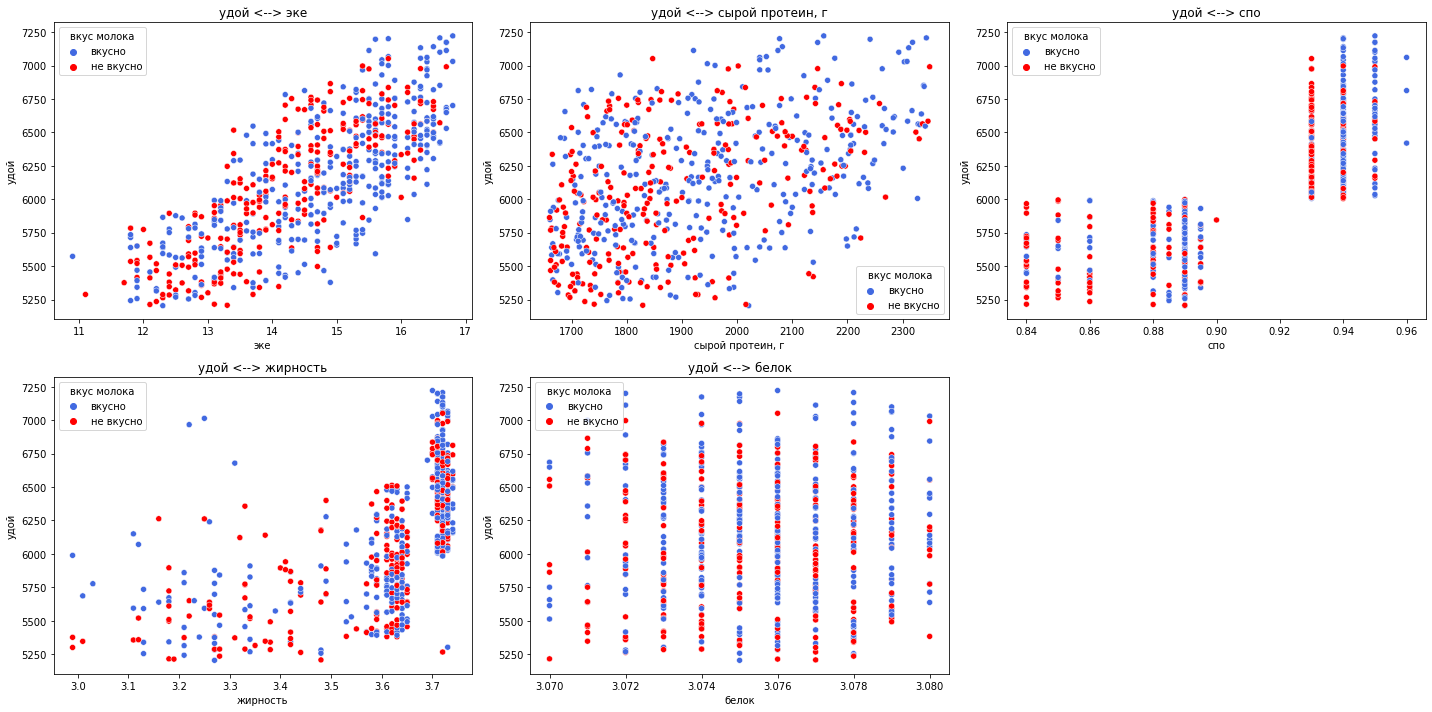

In [72]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(corr_attribute, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой', hue='вкус молока', palette=['royalblue', 'red'])
    plt.title(f'удой <--> {feature}')

plt.tight_layout()
plt.show()

**Промежуточный вывод**

Светлые тона говорят о сильной линейной зависимости, а тёмные — о слабой.  
эке: Наблюдается положительная взаимосвязь выше умеренного значения. С увеличением "удоя" постепенно увеличивается и эке.
сырой_протеин: Взаимосвязь между содержанием сырого протеина и удоем не так ясна. Связь умеренно положительная. Связь целевого признака Удоя молока с другими признаками не линейная;
Мультиколинеарность не наблюдаем. Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0,9 до 0,95.

## Шаг 5. Обучение модели линейной регрессии

### 5.1 Первая Модель

In [83]:
ferma_main.head()

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [84]:
RANDOM_STATE = 42

X = ferma_main.drop('удой', axis=1)
y = ferma_main['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

In [85]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'вкус молока', 'возраст']
num_col_names = ['эке', 'спо', 'сырой протеин, г']

# Мштабируем данные 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])


# создадим переменную с экземпляром класса OneHotEncoder()
encoder = OneHotEncoder(drop = 'first', sparse = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
#encoder_col_names = encoder.get_feature_names_out()
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
display(X_train.shape)
X_test.shape

(459, 8)

(153, 8)

In [86]:
<# инициализируйте модель линейной регрессии
model_lr_1  = LinearRegression() 

# обучите модель на тренировочных данных
model_lr_1.fit(X_train, y_train) 

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions_1 = model_lr_1.predict(X_test)

Оценим качество модели, рассчитаем R², проанализируем остатки с помощью графиков.

In [87]:
r2_1 = r2_score(y_test, predictions_1) 
print(f'Коэффициент детерминации 1 модели равен  {r2_1:.4f}')

Коэффициент детерминации 1 модели равен  0.8034


Модель точно предсказывает в 80,34% случаев предсказание модели ближе к истине, чем среднее значение целевого признака.

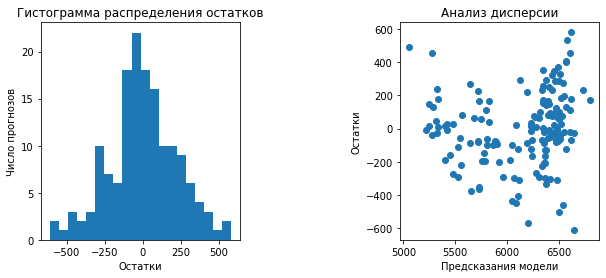

In [88]:
#Рассчитаем остатки
residuals_1 = y_test - predictions_1

# построим гистограмму распределения количественных признаков и диаграмму рассеяния

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.subplots_adjust(wspace=0.8, hspace=1.5)
axes[0].hist(residuals_1, bins = 20)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Число прогнозов')

axes[1].scatter(x = predictions_1, y = residuals_1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Остатки имеют не нормальное распределение, график не симметричен относительно нуля, максимльное значение остатков модели варьируется от -200 до -150. Достаточно много ошибок в диапазоне +/- 200 от нуля. Модель даёт как завышенные, так и заниженные предсказания, но заниженных на 150-200 кг больше.

In [89]:
rmse_1 = mean_squared_error(y_test, predictions_1, squared=False)
mse_1 = mean_squared_error(y_test, predictions_1)
mae_1 = mean_absolute_error(y_test, predictions_1)
print(f'Корень среднеквадратической ошибки (RMSE) равен {rmse_1:.4f}')
print(f'Среднеквадратическая ошибка (MSE) равна {mse_1:.4f}')
print(f'Средняя абсолютная ошибка (MAE) равна {mae_1:.4f}')

Корень среднеквадратической ошибки (RMSE) равен 220.7035
Среднеквадратическая ошибка (MSE) равна 48710.0347
Средняя абсолютная ошибка (MAE) равна 169.9506


### 5.2 Вторая Модель

In [90]:
# Создадим копию датасета
ferma_mn_2 = ferma_main.copy(deep=True)

# Проверка
display(ferma_main.shape)
display(ferma_mn_2.shape)
display(ferma_mn_2.head())

(612, 12)

(612, 12)

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [91]:
# Преобразуем СПО в категориальный признак
ferma_mn_2['спо_кат'] = ferma_mn_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)
display(ferma_mn_2['спо_кат'].value_counts())

# Преобразуем признак ЭКЕ 
ferma_mn_2['эке_в_квадрате'] = ferma_mn_2['эке'] ** 2

# Убираем неважные столбцы
ferma_mn_2 = ferma_mn_2.drop(['id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
ferma_mn_2.head()

1    363
0    249
Name: спо_кат, dtype: int64

,удой,"сырой протеин, г",порода,тип пастбища,порода папы_быка,вкус молока,возраст,спо_кат,эке_в_квадрате
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,вкусно,более_2_лет,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,не вкусно,более_2_лет,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,не вкусно,более_2_лет,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,0,163.84


In [92]:
X = ferma_mn_2.drop('удой', axis=1)
y = ferma_mn_2['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

In [93]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'вкус молока', 'возраст']
num_col_names = ['эке_в_квадрате', 'спо_кат', 'сырой протеин, г']


# Маштабируем данные 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])


# создадим переменную с экземпляром класса OneHotEncoder()
encoder = OneHotEncoder(drop = 'first', sparse = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
#encoder_col_names = encoder.get_feature_names_out()
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [94]:
# инициализируйте модель линейной регрессии
model_lr_two  = LinearRegression() 

# обучите модель на тренировочных данных
model_lr_two.fit(X_train, y_train) 

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions_2 = model_lr_two.predict(X_test)

In [95]:
r2_2 = r2_score(y_test, predictions_2) 
print(f'Коэффициент детерминации второй модели равен {r2_2:.4f}')

Коэффициент детерминации второй модели равен 0.8333


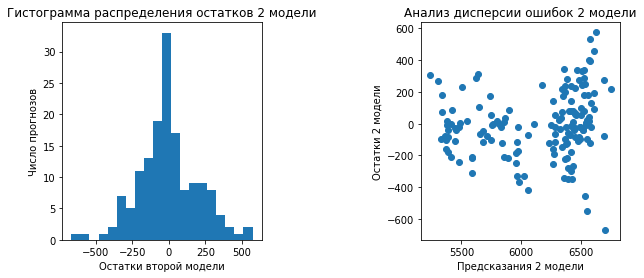

In [96]:
#Рассчитаем остатки
residuals_2 = y_test - predictions_2

# построим гистограмму распределения количественных признаков и диаграмму рассеяния

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.subplots_adjust(wspace=0.8, hspace=1.5)
axes[0].hist(residuals_2, bins = 20)
axes[0].set_title('Гистограмма распределения остатков 2 модели')
axes[0].set_xlabel('Остатки второй модели')
axes[0].set_ylabel('Число прогнозов')

axes[1].scatter(x = predictions_2, y = residuals_2)
axes[1].set_xlabel('Предсказания 2 модели')
axes[1].set_ylabel('Остатки 2 модели')
axes[1].set_title('Анализ дисперсии ошибок 2 модели')
plt.show()

In [97]:
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
mse_2 = mean_squared_error(y_test, predictions_2)
mae_2 = mean_absolute_error(y_test, predictions_2)
print(f'Корень среднеквадратической ошибки (RMSE) 2 модели равен {rmse_2:.4f}')
print(f'Среднеквадратическая ошибка (MSE) 2 модели равна {mse_2:.4f}')
print(f'Средняя абсолютная ошибка (MAE) 2 модели равна {mae_2:.4f}')

Корень среднеквадратической ошибки (RMSE) 2 модели равен 203.2650
Среднеквадратическая ошибка (MSE) 2 модели равна 41316.6660
Средняя абсолютная ошибка (MAE) 2 модели равна 153.5117


Изученные свойства остатков во время анализа второй модели и основные выводы:

Случайность: остатки весьма нормально распределены, график — относительно симметричен от самого частого значения. Отклонение от средней суммы остатков 0 - минимально.
Устойчивость: дисперсия остатков - нормальная Разница между минимумом и максимумом остатков при любых прогнозных значениях модели минимальна.

### 5.3 Третья Модель

In [355]:
ferma_main.head()

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [356]:
# Добавляем в данные признак имя_папы из файла ferma_dad
ferma_full = ferma_main.merge(ferma_dad, on='id')
ferma_full.head()

# Преобразуем СПО в категориальный признак
ferma_full['спо_кат'] = ferma_full['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Преобразуем признак ЭКЕ 
ferma_full['эке_в_квадрате'] = ferma_full['эке'] ** 2

# Убираем неважные столбцы
ferma_full = ferma_full.drop(['id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
ferma_full.head()

,удой,"сырой протеин, г",порода,тип пастбища,порода папы_быка,вкус молока,возраст,имя_папы,спо_кат,эке_в_квадрате
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,вкусно,более_2_лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,Соловчик,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,не вкусно,более_2_лет,Барин,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,не вкусно,более_2_лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,Барин,0,163.84


In [357]:
X = ferma_full.drop('удой', axis=1)
y = ferma_full['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

In [358]:
X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

In [359]:
X_train_full.head()

,"сырой протеин, г",порода,тип пастбища,порода папы_быка,вкус молока,возраст,имя_папы,спо_кат,эке_в_квадрате
0,1984,Вис Бик Айдиал,Равнинное,Айдиал,не вкусно,более_2_лет,Буйный,1,198.81
1,1984,Вис Бик Айдиал,Равнинное,Айдиал,вкусно,более_2_лет,Буйный,1,246.49
2,2067,Вис Бик Айдиал,Холмистое,Айдиал,вкусно,более_2_лет,Буйный,1,249.64
3,2091,Вис Бик Айдиал,Равнинное,Соверин,не вкусно,более_2_лет,Соловчик,1,243.36
4,1721,РефлешнСоверинг,Равнинное,Соверин,вкусно,более_2_лет,Барин,0,182.25


In [360]:
y_train_full.head()

0    6372
1    6642
2    6109
3    6475
4    5694
Name: удой, dtype: int64

In [268]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'вкус молока', 'возраст']
num_col_names = ['эке_в_квадрате', 'спо_кат', 'сырой протеин, г']

# Маштабируем данные 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])


# создадим переменную с экземпляром класса OneHotEncoder()
encoder = OneHotEncoder(drop = 'first', sparse = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
#encoder_col_names = encoder.get_feature_names_out()
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
display(X_train.shape)
X_test.shape

(471, 8)

(157, 8)

In [269]:
# инициализируем модель линейной регрессии
model_lr_three  = LinearRegression() 

# обучим модель на тренировочных данных
model_lr_three.fit(X_train, y_train) 

# получим предсказания модели на тестовых данных 
# сохраним результат в переменную predictions
predictions_3 = model_lr_three.predict(X_test)

In [270]:
r2_3 = r2_score(y_test, predictions_3) 
print(f'Коэффициент детерминации третьей модели равен {r2_3:.4f}')

Коэффициент детерминации третьей модели равен 0.8201


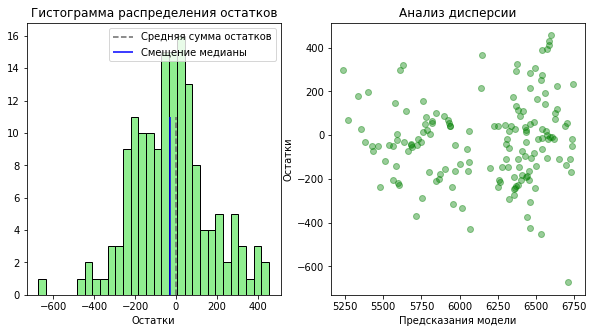

In [271]:
# Выделяем остатки
residuals_3 = y_test - predictions_3

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_3, bins=30, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_3.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions_3, residuals_3, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [272]:
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)
mse_3 = mean_squared_error(y_test, predictions_3)
mae_3 = mean_absolute_error(y_test, predictions_3)
print(f'Корень среднеквадратической ошибки (RMSE) 3 модели равен {rmse_3:.4f}')
print(f'Среднеквадратическая ошибка (MSE) 3 модели равна {mse_3:.4f}')
print(f'Средняя абсолютная ошибка (MAE) 3 модели равна {mae_3:.4f}')

Корень среднеквадратической ошибки (RMSE) 3 модели равен 191.3684
Среднеквадратическая ошибка (MSE) 3 модели равна 36621.8730
Средняя абсолютная ошибка (MAE) 3 модели равна 147.7794


Если сравнивать показатели r2, распределение и дисперсию остатков, то лучшие показатели - у третьй модели. У нее максимальный коэффициент детерминации, т е в 82,4% случаев предсказания модели точнее среднего значения целевого признака. Распределение остатков третьей модели похоже на нормальное, с самым высоким пиком в нуле (т е больше всего ошибок модели равны нулю).

### Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

In [113]:
# Сравнение r2_score
scores_compared = {'первой': r2_1, 'второй': r2_2, 'третьей': r2_3}
for k, v in scores_compared.items():
    print(f'R2_score {k} модели: {v}')

print('---')

# Сравнение остатков
residuals_compared = {'первой': residuals_1, 'второй': residuals_2, 'третьей': residuals_3}
for k, v in residuals_compared.items():
    print(f'Среднее значение остатков {k} модели: {v.mean()}')

R2_score первой модели: 0.8034133611669033
R2_score второй модели: 0.8332519251903154
R2_score третьей модели: 0.8332519251903154
---
Среднее значение остатков первой модели: -0.2440859222818474
Среднее значение остатков второй модели: -5.6645201958790015
Среднее значение остатков третьей модели: -5.6645201958790015


### Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.

In [114]:
# Пропишем циклы, выводящие основные метрики
mse_compared = {'первой': mse_1, 'второй': mse_2, 'третьей': mse_3}
for k, v in mse_compared.items():
    print(f'MSE {k} модели: {v}')

print('---')

rmse_compared = {'первой': rmse_1, 'второй': rmse_2, 'третьей': rmse_3}
for k, v in rmse_compared.items():
    print(f'RMSE {k} модели: {v}')

print('---')

mae_compared = {'первой': mae_1, 'второй': mae_2, 'третьей': mae_3}
for k, v in mae_compared.items():
    print(f'MAE {k} модели: {v}')

MSE первой модели: 48710.034678146425
MSE второй модели: 41316.666049668696
MSE третьей модели: 41316.666049668696
---
RMSE первой модели: 220.70349946964237
RMSE второй модели: 203.2650143277704
RMSE третьей модели: 203.2650143277704
---
MAE первой модели: 169.9505685991933
MAE второй модели: 153.51168545643048
MAE третьей модели: 153.51168545643048


### С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

In [273]:
ferma_main.head()

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [274]:
cow_buy.head()

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [275]:
# Создаем копию датасета
cow_buy_2 = cow_buy.copy(deep=True)

# Считаем среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = ferma_main[['эке', 'сырой протеин, г', 'спо']].mean()
new_values = mean_values * 1.05

# Добавляем недостающие признаки в датасет cow_buy и преобразовываем их
cow_buy_2['эке'] = new_values['эке']
cow_buy_2['эке_в_квадрате'] = cow_buy_2['эке'] ** 2
cow_buy_2['сырой протеин, г'] = new_values['сырой протеин, г']
cow_buy_2['спо'] = new_values['спо']
cow_buy_2['спо_кат'] = cow_buy_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)


cow_buy_2.head()

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке,эке_в_квадрате,"сырой протеин, г",спо,спо_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,1


In [276]:
cow_buy_2 = cow_buy_2.drop(['текущий_уровень_белок,%', 'эке', 'спо'], axis=1)

cow_buy_2.head()

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%",возраст,эке_в_квадрате,"сырой протеин, г",спо_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,более_2_лет,233.361138,2019.947532,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,менее_2_лет,233.361138,2019.947532,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,более_2_лет,233.361138,2019.947532,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,более_2_лет,233.361138,2019.947532,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,более_2_лет,233.361138,2019.947532,1


In [277]:
X_train_full = X_train_full.drop('вкус молока', axis=1)

X_train_full.head()

,"сырой протеин, г",порода,тип пастбища,порода папы_быка,возраст,имя_папы,спо_кат,эке_в_квадрате
0,2123,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Соловчик,1,272.25
1,1889,РефлешнСоверинг,Холмистое,Соверин,менее_2_лет,Барин,0,156.25
2,1671,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный,0,216.09
3,2063,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,Буйный,1,207.36
4,2077,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Геркулес,0,171.61


In [278]:
# Проверка
display(cow_buy_2.shape)
display(X_train_full.shape)
display(cow_buy_2.head())
display(X_train_full.head())

(16, 9)

(628, 8)

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%",возраст,эке_в_квадрате,"сырой протеин, г",спо_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,более_2_лет,233.361138,2019.947532,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,менее_2_лет,233.361138,2019.947532,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,более_2_лет,233.361138,2019.947532,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,более_2_лет,233.361138,2019.947532,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,более_2_лет,233.361138,2019.947532,1


,"сырой протеин, г",порода,тип пастбища,порода папы_быка,возраст,имя_папы,спо_кат,эке_в_квадрате
0,2123,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Соловчик,1,272.25
1,1889,РефлешнСоверинг,Холмистое,Соверин,менее_2_лет,Барин,0,156.25
2,1671,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный,0,216.09
3,2063,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,Буйный,1,207.36
4,2077,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Геркулес,0,171.61


In [283]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст', 'имя_папы', 'спо_кат']
num_col_names = ['эке_в_квадрате', 'сырой протеин, г']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_2[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_2[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [284]:
%%time
final_reg = LogisticRegression()
final_reg.fit(X_train_full, y_train_full)
pred = final_reg.predict(X_test_full)
pred

CPU times: user 1.79 s, sys: 2.06 s, total: 3.85 s
Wall time: 3.74 s


array([6755, 6248, 6173, 6601, 6601, 6755, 6248, 6601, 6084, 6755, 6755,
       6122, 6601, 6084, 6755, 6248])

In [287]:
# Посчитаем 95% доверительный интервал лучшей модели 
print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(predictions_1), scale=st.sem(predictions_1)))

95% доверительный интервал = (6072.400195292625, 6206.859218382004)


In [288]:
# Посчитаем 95% доверительный интервал лучшей модели 
print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(predictions_2), scale=st.sem(predictions_2)))

95% доверительный интервал = (6077.169727851285, 6212.930554370539)


In [289]:
# Посчитаем 95% доверительный интервал лучшей модели 
print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал = (6104.19922618245, 6230.316008705314)


In [285]:
cow_buy['ожидаемый_удой'] = pred
cow_buy

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,ожидаемый_удой
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6601
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6601
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6755
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6248
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6601
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6084
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6755


**Промежуточные Выводы:**

Выявили лучшую модель из трех на валидационной выборке, показатели которой:

MAE - 153.51168545643048
MSE - 41316.666049668696
RMSE - 203.2650143277704
95% доверительный интервал = (6104.19922618245, 6230.316008705314)

Собрали train + valid выборки в единую обучающую и протестировали модель на тестовой выборке:

Получили предсказания по всем коровам продавца
По условию задачи регрессии, можем на данном этапе рекомендовать фермеру для покупки всех коров. Каждая из них, вероятно, выдает более 6000 кг удоя в год.

## Шаг 6. Обучение модели логистической регрессии

### Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.

In [120]:
ferma_main.head()

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [141]:
RANDOM_STATE = 42

X = ferma_main.drop(columns='вкус молока', axis = 2)
y = ferma_main['вкус молока']
y = y.replace('вкусно','1')
y = y.replace('не вкусно','0')
y = y.astype(str).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)

cat_col_names = ['тип пастбища', 'порода папы_быка', 'возраст', 'порода']
num_col_names = ['эке', 'сырой протеин, г', 'спо']


# приводим значения всех признаков к единой шкале
scaler = StandardScaler()

X_train_scalled = scaler.fit_transform(X_train[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scalled = scaler.transform(X_test[num_col_names])

# создадим переменную с экземпляром класса OneHotEncoder()
encoder = OneHotEncoder(drop = 'first', sparse = False)

# обучими трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scalled = pd.DataFrame(X_train_scalled, columns=num_col_names)
X_test_scalled = pd.DataFrame(X_test_scalled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scalled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scalled], axis=1)

In [142]:
#инициализация модели
clf = LogisticRegression(random_state=RANDOM_STATE)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)  

In [143]:
clf_accuracy = accuracy_score(y_pred, y_valid)
clf_recall = recall_score(y_pred, y_valid)
clf_precision = precision_score(y_pred, y_valid)

print(f'Accuracy: {clf_accuracy}')
print(f'Recall: {clf_recall}')
print(f'Precision: {clf_precision}')
print('---')

Accuracy: 0.5424836601307189
Recall: 0.5798319327731093
Precision: 0.7752808988764045
---


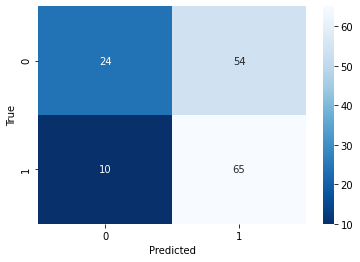

In [144]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True')
plt.xlabel('Predicted'); 

Модель 65 раз правильно предсказывает, что молоко будет вкусным, 54 раз неправильно предсказывает, что молоко будет невкусным.


10 раз модель ошибочно выдала невкусное молоко за вкусное (ошибка первого рода False Positive) и 24 раз выдала вкусное молоко за невкусное (ошибка второго рода False Negative).

In [149]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_pred, y_proba),
             columns = ['y_test', 'y_pred', 'y_proba']).sort_values(by='y_proba', ascending=True)

print(data.head()) 
print()
print(data.tail(15))

     y_test  y_pred   y_proba
16        0       0  0.296348
37        0       0  0.329900
82        0       0  0.337516
151       0       0  0.373506
65        0       0  0.374158

     y_test  y_pred   y_proba
24        1       0  0.771440
110       1       0  0.771939
33        0       0  0.774953
135       1       0  0.775397
140       1       0  0.778787
21        1       1  0.786299
8         1       1  0.798212
36        1       1  0.798826
89        1       1  0.803022
32        1       1  0.805545
40        1       1  0.811412
93        1       1  0.815481
46        1       1  0.816732
112       1       1  0.828354
115       1       1  0.836272


In [150]:
print(data[130:143])

     y_test  y_pred   y_proba
66        1       0  0.755127
152       1       0  0.756315
113       1       0  0.756831
134       0       0  0.757698
68        1       0  0.764774
20        1       0  0.766876
25        0       0  0.767158
43        1       0  0.770745
24        1       0  0.771440
110       1       0  0.771939
33        0       0  0.774953
135       1       0  0.775397
140       1       0  0.778787


Gодберем значение порога более 0.78 так как при значении вероятности (y_proba) 0.7736 модель присвоила целевому признаку значение 1 при значении y_test = 0, значит, при таком пороге уже возможны False Positive случаи. Наша задача - минимизировать, а лучше свести к нулю False Positive. 

In [153]:
THRESHOLD = 0.78
y_pred = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

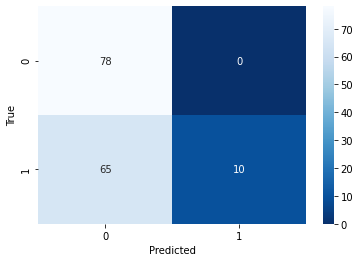

In [154]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True')
plt.xlabel('Predicted'); 

In [155]:
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Метрика accuracy модели: ', round(accuracy, 3))
print('recall модели: ',round(recall ,3))
print('precision модели: ',round(precision,3))

Метрика accuracy модели:  0.575
recall модели:  0.133
precision модели:  1.0


 Спрогнозируем вкус молока коров, которых фермер хочет купить. 

In [79]:
ferma_main_dad = pd.merge(ferma_main, ferma_dad)
ferma_main_dad.head()

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке,эке в квадрате
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271152,233.208082
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271152,233.208082
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271152,233.208082
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271152,233.208082
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271152,233.208082
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271152,233.208082
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271152,233.208082
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271152,233.208082
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271152,233.208082
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271152,233.208082


In [148]:
cow_buy['эке'] = ferma_main['эке'].mean()*1.05
cow_buy['эке в квадрате'] = cow_buy['эке']**2
cow_buy['вкус молока'] = 0
cow_buy['возраст'] = cow_buy['возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
cow_buy['сырой протеин, г'] = ferma_main['сырой протеин, г']
cow_buy['спо'] = ferma_main['спо']
a = ferma_main_dad
b = 'удой'
c = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст', 'спо', 'имя_папы']
d = ['эке в квадрате', 'сырой протеин, г']
ferma_main_dad['возраст'] = ferma_main_dad['возраст'].apply(lambda x: 1 if x == 'более 2 лет' else 0)
ferma_main_dad.head()
cow_buy.head()

,порода,тип пастбища,порода папы_быка,имя_папы,жирность,белок,возраст,эке,эке в квадрате,вкус молока,"сырой протеин, г",спо
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,0,15.271152,233.208082,0,1743,0.890
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.271152,233.208082,0,2138,0.890
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,0,15.271152,233.208082,0,1854,0.885
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0,15.271152,233.208082,0,2012,0.885
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0,15.271152,233.208082,0,1675,0.885


In [154]:
cow_buy.head()

,порода,тип пастбища,порода папы_быка,имя_папы,жирность,белок,возраст,эке,эке в квадрате,вкус молока,"сырой протеин, г",спо
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,0,15.271152,233.208082,0,1743,0.890
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0,15.271152,233.208082,0,2138,0.890
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,0,15.271152,233.208082,0,1854,0.885
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0,15.271152,233.208082,0,2012,0.885
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0,15.271152,233.208082,0,1675,0.885


In [137]:
ferma_main_dad.head()

,id,удой,эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,0,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,0,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,0,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,0,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,0,Барин


In [164]:
X_train = ferma_main_dad
X_test = cow_buy

target = 'вкус молока'
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст']
num_col_names = ['эке', 
                 'сырой протеин, г', 
                 'спо', 
                 'жирность' , 
                 'белок']


X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
clf = LogisticRegression()
clf = clf.fit(X, y)

In [165]:
X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)   


y_pred = clf.predict_proba(X_cow)[:,1] 

In [168]:
cow_buy['y_pred'] = y_pred

cow_buy['вкус молока'] = cow_buy['y_pred'].apply(lambda x: 'вкусно' if x > 0.78 else 'не вкусно')      
cow_buy['возраст'] = cow_buy['возраст'].apply(lambda x: 'более 2 лет' if x == 1 else 'менее 2 лет')

cow_buy = cow_buy.sort_values(by = ['y_pred'], ascending = False)
cow_buy = cow_buy.drop(columns='y_pred') 

display(cow_buy)

,порода,тип пастбища,порода папы_быка,имя_папы,жирность,белок,возраст,эке,эке в квадрате,вкус молока,"сырой протеин, г",спо
17,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее 2 лет,15.271152,233.208082,вкусно,1873,0.895
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,15.271152,233.208082,вкусно,1806,0.885
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,менее 2 лет,15.271152,233.208082,не вкусно,2193,0.930
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,менее 2 лет,15.271152,233.208082,не вкусно,1678,0.895
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,менее 2 лет,15.271152,233.208082,не вкусно,1675,0.885
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,менее 2 лет,15.271152,233.208082,не вкусно,2012,0.885
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,менее 2 лет,15.271152,233.208082,не вкусно,1854,0.885
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,менее 2 лет,15.271152,233.208082,не вкусно,2328,0.930
15,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,менее 2 лет,15.271152,233.208082,не вкусно,1747,0.930
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,менее 2 лет,15.271152,233.208082,не вкусно,2159,0.930


In [170]:
cow_buy.loc[cow_buy['вкус молока'] == 'вкусно']

,порода,тип пастбища,порода папы_быка,имя_папы,жирность,белок,возраст,эке,эке в квадрате,вкус молока,"сырой протеин, г",спо
17,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее 2 лет,15.271152,233.208082,вкусно,1873,0.895
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,15.271152,233.208082,вкусно,1806,0.885


**Промежуточные Выводы:**

Модель 65 раз правильно предсказывает, что молоко будет вкусным, 54 раз неправильно предсказывает, что молоко будет невкусным.

10 раз модель ошибочно выдала невкусное молоко за вкусное (ошибка первого рода False Positive) и 24 раз выдала вкусное молоко за невкусное (ошибка второго рода False Negative).

Самое оптимальное значение порога — 0.78. При минимальном значении критической ошибки мы получаем 3 коровы как количество истинно-положительного результата целевого признака вкуса молока.

При минимальном значении критической ошибки мы получаем 2 коровы как количество истинно-положительного результата целевого признака вкуса молока.
Фермер, учитывая свои требования к объему удоев и качеству молока, может купить 2 коровы из стада с минимальным риском для себя.

## Итоговые выводы

#  1. Загрузка данных:

- ferma_main

  Изменили названия столбцов и привести их к единому виду. С типами данных все в порядке.
  
- ferma_dad

  Изменили названия столбцов и привести их к единому виду. В остальном данные в порядке.

- cow_buy

  Изменили названия столбцов и привести их к единому виду. 


# 2.  Предобработка данных

- Пропусков не обнаружено.

- ferma_main Обнаружено 5 явных дубликатов, удалим их.
- cow_buy Обнаружено 4 явных дубликатов, удалим их.
- Изменили названия переменных в порода папы_быка и тип пастбища.



# 3. Исследовательский анализ данных

- Удалили значение 45616.000000 в признаке удой
- Удалим выбросы в признаке белок: значение менее 3.069 и более 3.081
- Почти все признаки распределены нормально и не требуют особых корректировок выбросов
- Для признака Удой Медианное значение около 6000, есть выбросы около 7300 и 5200. 
- Распределение категориальных переменных в норме, критических изменений не было внесено


# 4. Корреляционный анализ

Светлые тона говорят о сильной линейной зависимости, а тёмные — о слабой.  
эке: Наблюдается положительная взаимосвязь выше умеренного значения. С увеличением "удоя" постепенно увеличивается и эке.
сырой_протеин: Взаимосвязь между содержанием сырого протеина и удоем не так ясна. Связь умеренно положительная. Связь целевого признака Удоя молока с другими признаками не линейная;
Мультиколинеарность не наблюдаем. Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0,9 до 0,95.

# 5. Обучение модели линейной регрессии

Выявили лучшую модель из трех на валидационной выборке, показатели которой:

MAE - 153.51168545643048
MSE - 41316.666049668696
RMSE - 203.2650143277704
95% доверительный интервал = (6104.19922618245, 6230.316008705314)

Собрали train + valid выборки в единую обучающую и протестировали модель на тестовой выборке:

Получили предсказания по всем коровам продавца
По условию задачи регрессии, можем на данном этапе рекомендовать фермеру для покупки всех коров. Каждая из них, вероятно, выдает более 6000 кг удоя в год.

# 6. Обучение модели логистической регрессии

Модель 65 раз правильно предсказывает, что молоко будет вкусным, 54 раз правильно предсказывает, что молоко будет невкусным.

10 раз модель ошибочно выдала невкусное молоко за вкусное и 24 раз выдала вкусное молоко за невкусное.

Самое оптимальное значение порога — 0.78. При минимальном значении критической ошибки мы получаем 3 коровы как количество истинно-положительного результата целевого признака вкуса молока.

Модель 65 раз правильно предсказывает, что молоко будет вкусным, 54 раз неправильно предсказывает, что молоко будет невкусным.

10 раз модель ошибочно выдала невкусное молоко за вкусное (ошибка первого рода False Positive) и 24 раз выдала вкусное молоко за невкусное (ошибка второго рода False Negative).

Самое оптимальное значение порога — 0.78. При минимальном значении критической ошибки мы получаем 3 коровы как количество истинно-положительного результата целевого признака вкуса молока.

При минимальном значении критической ошибки мы получаем 2 коровы как количество истинно-положительного результата целевого признака вкуса молока.
Фермер, учитывая свои требования к объему удоев и качеству молока, может купить 2 коровы из стада с минимальным риском для себя.